<a href="https://colab.research.google.com/github/JeneryBautistaCanul/Coderbyte/blob/main/Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Librerias

In [1]:
import torch
from PIL import Image
import ipywidgets as widgets
from IPython.display import display

1. Verifica que el archivo de pesos .pt es válido

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

/usr/local/lib/python3.10/dist-packages/torch/hub.py:330: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


YOLOv5 🚀 2024-12-3 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

100%|██████████| 14.1M/14.1M [00:00<00:00, 275MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


2. Instala y actualiza las dependencias

In [3]:
!pip install torch torchvision --upgrade
!pip install -U ultralytics

3. instala PyTorch con soporte para CUDA

In [6]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118


4. Limpiar y forzar recarga de caché

In [10]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/best.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2024-12-3 Python-3.10.12 torch-2.5.1+cu121 CPU

Fusing layers... 
Model summary: 322 layers, 86173414 parameters, 0 gradients, 203.8 GFLOPs
Adding AutoShape... 


# Imagen

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2024-12-3 Python-3.10.12 torch-2.5.1+cu121 CPU

Fusing layers... 
Model summary: 322 layers, 86173414 parameters, 0 gradients, 203.8 GFLOPs
Adding AutoShape... 


FileUpload(value={}, accept='image/*', description='Upload')

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 240x320 1 flor
Speed: 27.9ms pre-process, 2882.3ms inference, 4.3ms NMS per image at shape (1, 3, 480, 640)


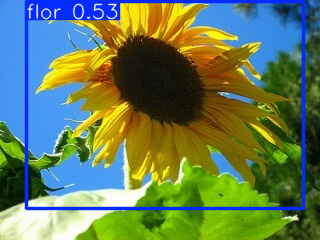

Saved 1 image to runs/detect/exp5


        xmin      ymin        xmax        ymax  confidence  class  name
0  26.540817  1.285583  303.760986  208.063049    0.525677      0  flor


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 244x320 11 flors
Speed: 6.6ms pre-process, 2977.1ms inference, 1.1ms NMS per image at shape (1, 3, 512, 640)


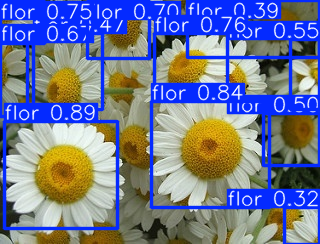

Saved 1 image to runs/detect/exp6


          xmin        ymin        xmax        ymax  confidence  class  name
0     4.388607  121.435471  117.808670  228.738693    0.887356      0  flor
1   151.685333  101.436691  269.053986  207.771500    0.837097      0  flor
2   154.423203   33.338661  227.243912   99.742393    0.761398      0  flor
3     0.000000    1.162870   44.670929   43.469536    0.753966      0  flor
4    87.921776    1.904385  149.563965   58.100174    0.702596      0  flor
5     0.326097   42.441620   27.731443  116.395187    0.665170      0  flor
6   290.953033   39.661053  319.565338  109.240219    0.549279      0  flor
7   263.081543  113.422356  319.240601  165.245117    0.496275      0  flor
8    33.327305   33.861530  102.782166  109.965469    0.472513      0  flor
9   187.445724    0.000000  319.449829   57.967094    0.388417      0  flor
10  284.410156  207.276260  319.672729  244.000000    0.323889      0  flor


In [1]:
import torch
from PIL import Image
import ipywidgets as widgets
from IPython.display import display

# Cargar el modelo YOLOv5
model_path = '/content/best.pt'
model = torch.hub.load('ultralytics/yolov5', 'custom', path=model_path, force_reload=True)

# Crear un widget para subir archivos
upload_widget = widgets.FileUpload(accept='image/*', multiple=False)  # Solo imágenes

# Mostrar el widget
display(upload_widget)

def on_upload_change(change):
    if upload_widget.value:
        # Obtener el contenido del archivo subido
        uploaded_file = list(upload_widget.value.values())[0]
        content = uploaded_file['content']
        filename = uploaded_file['metadata']['name']

        # Guardar la imagen localmente
        with open(filename, 'wb') as f:
            f.write(content)

        # Realizar la predicción
        results = model(filename)

        # Mostrar resultados
        results.print()
        results.show()
        results.save()  # Guarda la imagen con predicciones

        # Mostrar detalles de las predicciones
        predictions = results.pandas().xyxy[0]
        print(predictions)

# Asociar la función al cambio del widget
upload_widget.observe(on_upload_change, names='value')

# Video

In [2]:
!pip install torch torchvision opencv-python

In [ ]:
import cv2
import torch

# Cargar el modelo YOLOv5
model_path = '/content/best.pt'
model = torch.hub.load('ultralytics/yolov5', 'custom', path=model_path, force_reload=True)

# Ruta al archivo de video (o 0 para cámara en vivo)
video_path = 'ruta_al_video.mp4'  # Cambia esto por el archivo de video o usa 0 para la cámara en vivo
cap = cv2.VideoCapture(video_path)

# Verificar si el video/cámara se abrió correctamente
if not cap.isOpened():
    print("Error al abrir el archivo de video o la cámara.")
    exit()

# Procesar cada cuadro del video
while True:
    ret, frame = cap.read()
    if not ret:
        print("Fin del video o error al leer el cuadro.")
        break

    # Convertir el cuadro al formato que YOLO espera (BGR -> RGB)
    results = model(frame)

    # Obtener resultados del modelo
    labels, coords = results.xyxyn[0][:, -1], results.xyxyn[0][:, :-1]

    # Dibujar cuadros delimitadores en el marco
    for coord, label in zip(coords, labels):
        x1, y1, x2, y2, conf = coord
        if conf > 0.5:  # Umbral de confianza
            x1, y1, x2, y2 = int(x1 * frame.shape[1]), int(y1 * frame.shape[0]), int(x2 * frame.shape[1]), int(y2 * frame.shape[0])
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(frame, f"{model.names[int(label)]} {conf:.2f}", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Mostrar el cuadro procesado
    cv2.imshow('YOLOv5 Reconocimiento de Video', frame)

    # Salir con la tecla 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Liberar recursos
cap.release()
cv2.destroyAllWindows()